In [1]:
from smr import File

In [16]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'
# f_name = '/mnt/data/kkarbasi/SimpleSpike-Felix/Felix 2006.09.06/Felix 2006.09.06 1313 List.smr'

In [18]:
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [19]:
voltage_chan = smr_content.get_channel(0)
# HE_chan = smr_content.get_channel(1)
# VE_chan = smr_content.get_channel(2)

In [112]:
from kaveh.sorting.spikesorter import SimpleSpikeSorter

prang = slice(0,1000000)

sss = SimpleSpikeSorter(voltage_chan.data[prang], voltage_chan.dt)
sss.run()

<IPython.core.display.Javascript object>


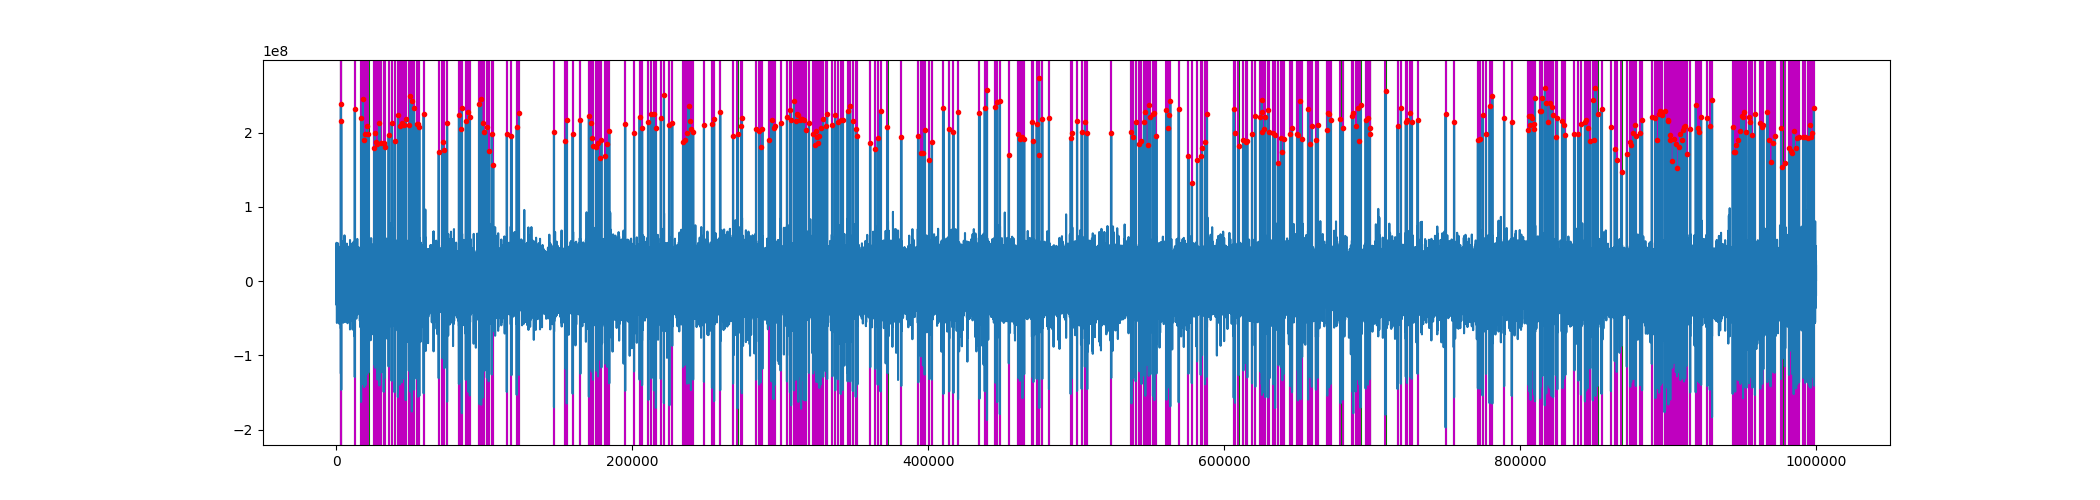

<IPython.core.display.Javascript object>


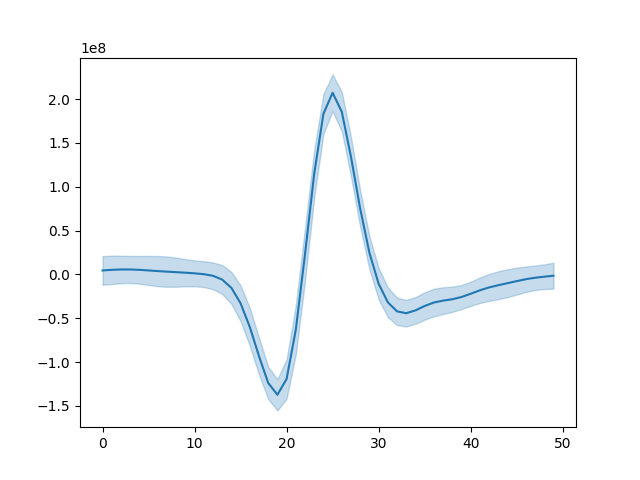

In [113]:
pre = 0.0005
post = 0.0005
sss.set_spike_window(pre, post)
sss.plot_spike_peaks()
sss._align_spikes()
sss.plot_spike_waveforms_average()

(388, 50)


<IPython.core.display.Javascript object>


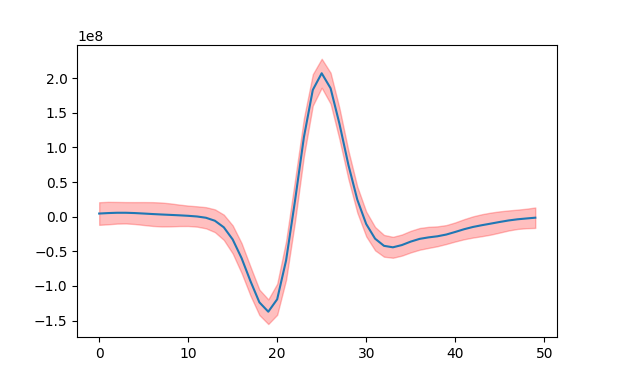

<IPython.core.display.Javascript object>


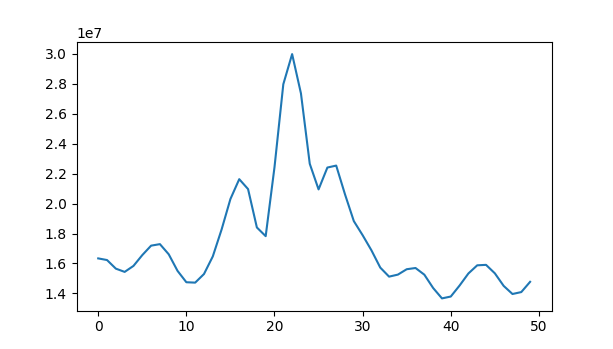

In [89]:
import matplotlib.pyplot as plt
spike_avg = np.mean(sss.aligned_spikes, axis = 0)
spike_std = np.std(sss.aligned_spikes, axis = 0)
x = np.arange(0, 50)

plt.figure()
plt.plot(x, spike_avg)

plt.fill_between(x, spike_avg - spike_std, spike_avg + spike_std, color='red', alpha=0.25)
plt.show()


plt.figure()
plt.plot(spike_std)